shapes: U = (1000, 1000) S: (3,) V^T: (3, 3) 

Spectrum:
 [1.61676740e+02 4.46626789e+01 2.03161886e-14] 

U:
 [[-0.03738673  0.00678253 -0.15294857 ... -0.01103285 -0.00124664
   0.01225774]
 [ 0.03416493  0.05616844  0.96221854 ... -0.00519949 -0.00634106
  -0.00182147]
 [ 0.04056112  0.01544218  0.00362358 ... -0.06865934 -0.04232162
   0.03706524]
 ...
 [ 0.05421321  0.04682507 -0.00394614 ...  0.99508713 -0.00321811
   0.00236737]
 [ 0.03926491  0.02662108  0.00135451 ... -0.00297185  0.99801262
   0.00138196]
 [-0.02185719 -0.02714269  0.00739673 ...  0.00271359  0.00172853
   0.99863142]] 

V^T:
 [[-0.12303116 -0.56783424 -0.81389656]
 [ 0.56408924 -0.71477102  0.41340746]
 [ 0.81649658  0.40824829 -0.40824829]] 

S:
 [[1.61676740e+02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.46626789e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.03161886e-14]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.0

Text(0, 0.5, 'xp2')

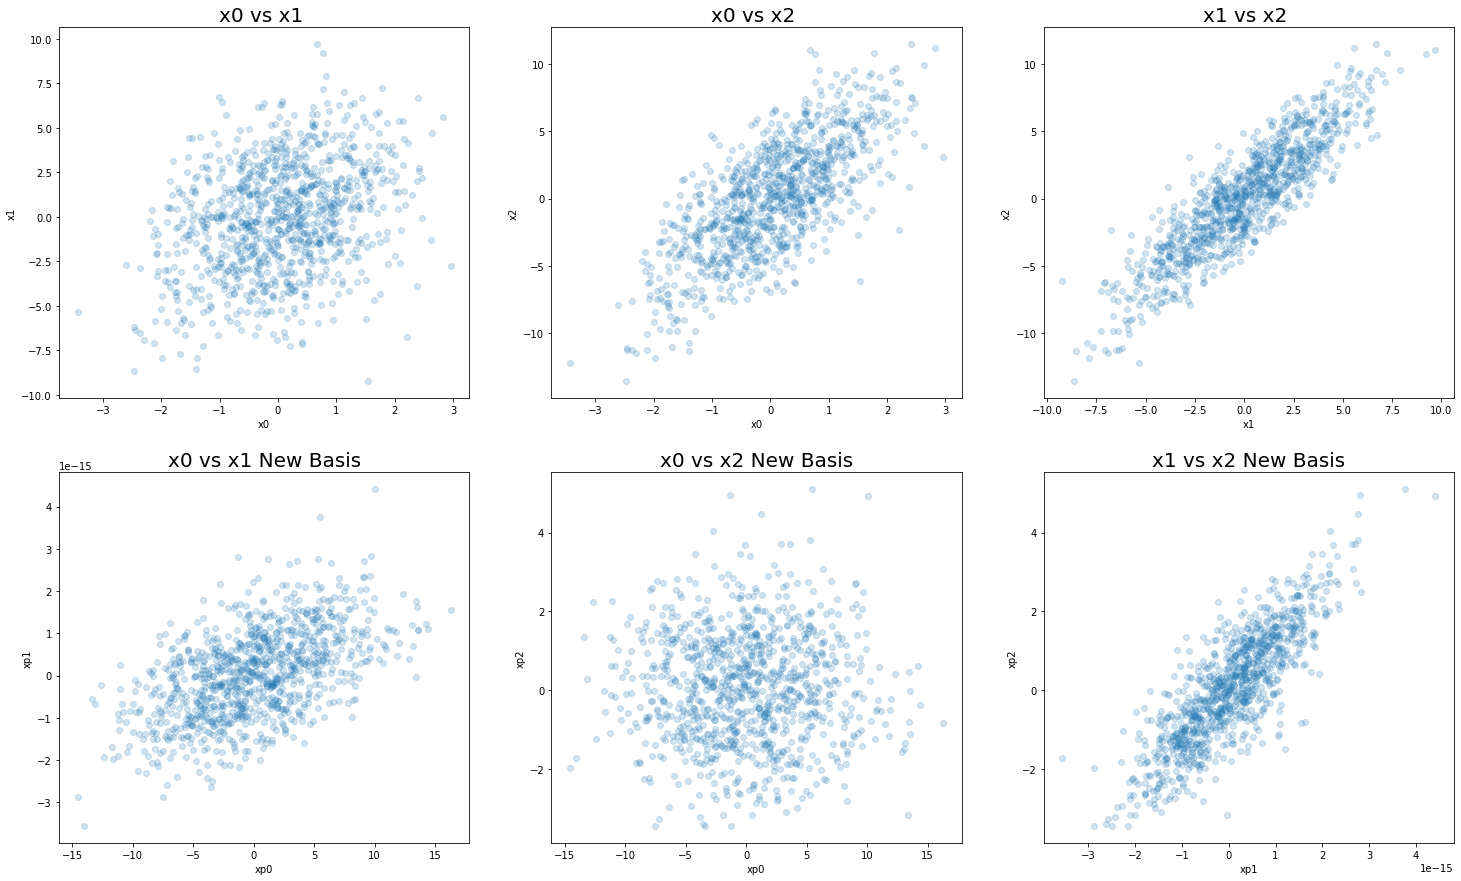

In [1]:
#%% QUESTION 1
import numpy as np
from random import seed
from scipy import stats
from scipy import linalg as la
import pandas as pd
from matplotlib import pyplot as plt

N=1000
x=np.zeros((N,3))
x_1 =np.random.normal(0, 1, N)
x_2 = x_1 + np.random.normal(0, 3, N)
x_3= 2*x_1 + x_2

x[:,0] =x_1 
x[:,1] = x_2
x[:,2] = x_3

df = pd.DataFrame(x)
np_cov = np.cov(df.T)
l, V = la.eig(np_cov)
U, s, Vt = la.svd(df)
print("shapes: U =", U.shape, "S:", s.shape, "V^T:", Vt.shape, '\n')
print("Spectrum:\n", s, '\n')
print("U:\n", U, '\n')
print("V^T:\n", Vt, '\n')

m,n=1000,3
S = np.zeros((m, n))
for i in range(min(m, n)):
    S[i, i] = s[i]
print("S:\n", S, '\n')

SVD = np.dot(U, np.dot(S, Vt))
print("SVD:\n", SVD, '\n')
print("Are the SVD and constructed matrices equal?", np.allclose(SVD, df))

import trace
l = np.real_if_close(l)
l_sum = np.sum(l)
Lambda = np.diag(l)
Lambda_sum = l[0] + l[2]

print("Lambda:\n", Lambda, '\n')
print("Trace(matrix):\n", np_cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0 and 2, we retain %s of the total variability" % (Lambda_sum/Lambda.trace()))

# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
xp = np.dot(V.T, df.T)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25, 15))
ax[0,0].scatter(x[:,0], x[:,1], alpha=0.2)
ax[0,0].set_title("x0 vs x1 ",fontsize=20)
ax[0,0].set_xlabel("x0")
ax[0,0].set_ylabel("x1")
ax[0,1].scatter(x[:,0], x[:,2], alpha=0.2)
ax[0,1].set_title("x0 vs x2 ",fontsize=20)
ax[0,1].set_xlabel("x0")
ax[0,1].set_ylabel("x2")
ax[0,2].scatter(x[:,1], x[:,2], alpha=0.2)
ax[0,2].set_title("x1 vs x2 ",fontsize=20)
ax[0,2].set_xlabel("x1")
ax[0,2].set_ylabel("x2")
ax[1,0].scatter(xp[0,:], xp[1,:], alpha=0.2)
ax[1,0].set_title("x0 vs x1 New Basis",fontsize=20)
ax[1,0].set_xlabel("xp0")
ax[1,0].set_ylabel("xp1")
ax[1,1].scatter(xp[0,:], xp[2,:], alpha=0.2)
ax[1,1].set_title("x0 vs x2 New Basis",fontsize=20)
ax[1,1].set_xlabel("xp0")
ax[1,1].set_ylabel("xp2")
ax[1,2].scatter(xp[1,:], xp[2,:], alpha=0.2)
ax[1,2].set_title("x1 vs x2 New Basis",fontsize=20)
ax[1,2].set_xlabel("xp1")
ax[1,2].set_ylabel("xp2")


shapes: U = (1000, 1000) S: (13,) V^T: (13, 13) 

Spectrum:
 [1.61676781e+02 4.46633878e+01 1.69529442e+00 1.67060047e+00
 1.65354344e+00 1.61762035e+00 1.57942965e+00 1.55717425e+00
 1.50538467e+00 1.47101724e+00 1.45083512e+00 1.42785697e+00
 2.02681494e-14] 

U:
 [[-3.73866175e-02  6.78268039e-03 -9.55611887e-03 ... -1.16506909e-02
  -3.09516160e-04  1.87351877e-02]
 [ 3.41652092e-02  5.61705915e-02  6.25379150e-02 ... -6.21616167e-03
  -5.31847896e-03  4.55922876e-04]
 [ 4.05610298e-02  1.54609547e-02  4.06258222e-02 ... -6.20588363e-02
  -3.79262211e-02  3.36561040e-02]
 ...
 [ 5.42133274e-02  4.68188724e-02 -5.29499539e-03 ...  9.85866550e-01
  -3.19513422e-04  1.07206586e-02]
 [ 3.92649353e-02  2.66159354e-02 -3.18425369e-02 ... -7.66229421e-04
   9.89828452e-01 -1.44578490e-03]
 [-2.18574547e-02 -2.71367732e-02 -2.86222342e-02 ...  1.10517563e-02
  -1.28971426e-03  9.86024713e-01]] 

V^T:
 [[-1.23031106e-01 -5.67834123e-01 -8.13896335e-01 -3.37872461e-04
  -2.87032051e-04 -9.63

Text(0, 0.5, 'xp2')

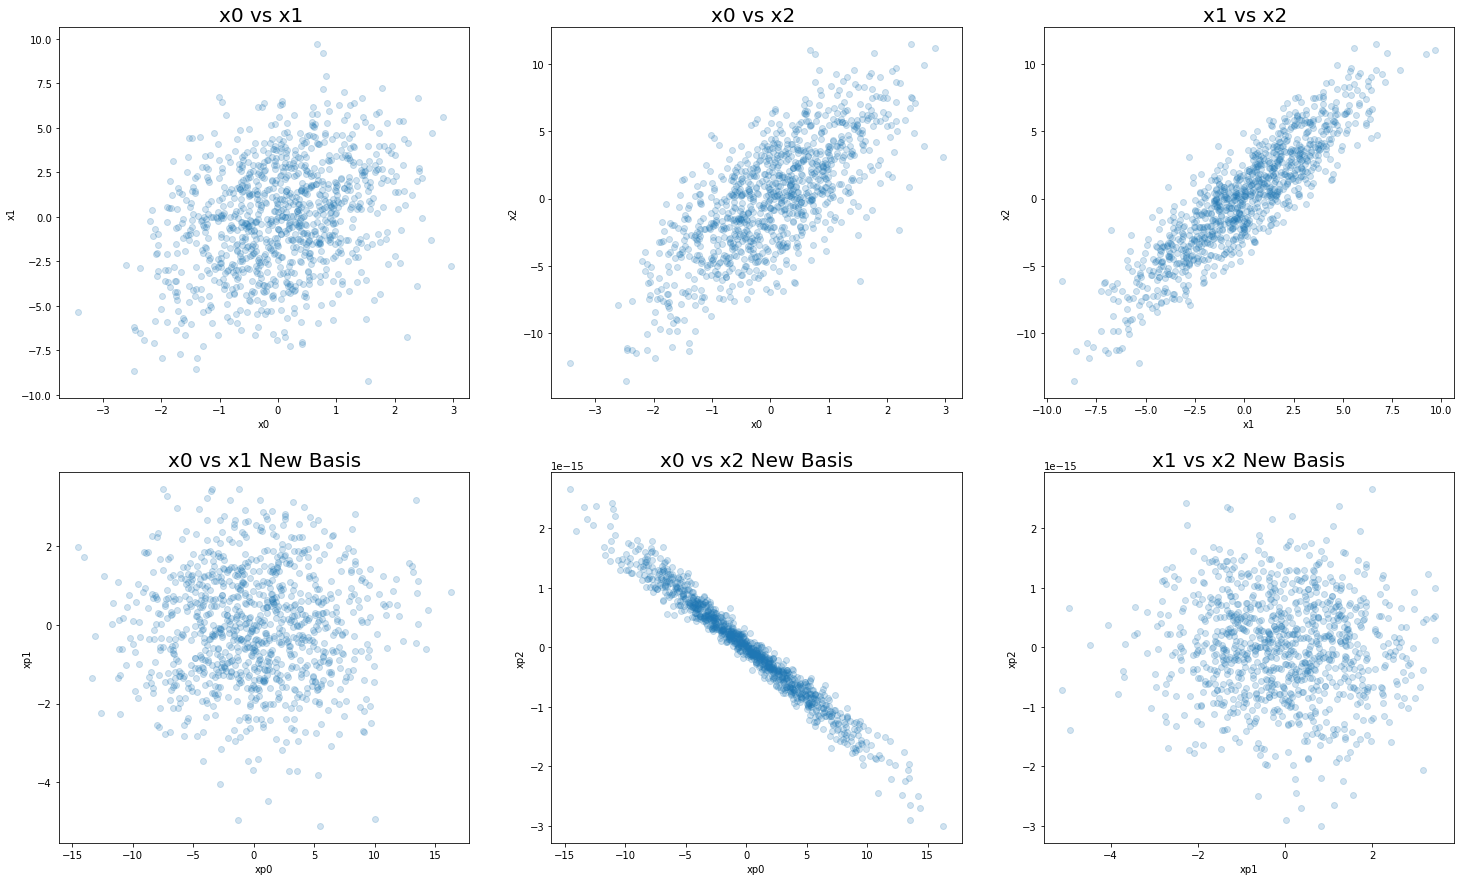

In [2]:
#%% QUESTION 2

noise = np.zeros((N,10)) # Generate noise
for i in range(10):
    noise[:,i] = np.random.normal(0,1/20, N)

x_new = np.hstack((x,noise))

df= pd.DataFrame(x_new)
np_cov = np.cov(df.T)
l, V = la.eig(np_cov)
U, s, Vt = la.svd(df)
print("shapes: U =", U.shape, "S:", s.shape, "V^T:", Vt.shape, '\n')
print("Spectrum:\n", s, '\n')
print("U:\n", U, '\n')
print("V^T:\n", Vt, '\n')

m,n=1000,13
S = np.zeros((m, n))
for i in range(min(m, n)):
    S[i, i] = s[i]
print("S:\n", S, '\n')

SVD = np.dot(U, np.dot(S, Vt))
print("SVD:\n", SVD, '\n')
print("Are the SVD and constructed matrices equal?", np.allclose(SVD, df))

import trace
l = np.real_if_close(l)
l_sum = np.sum(l)
Lambda = np.diag(l)
Lambda_sum = l[0] + l[2]

print("Lambda:\n", Lambda, '\n')
print("Trace(matrix):\n", np_cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0 and 2, we retain %s of the total variability" % (Lambda_sum/Lambda.trace()))

# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
xp = np.dot(V.T, df.T)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25, 15))
ax[0,0].scatter(x[:,0], x[:,1], alpha=0.2)
ax[0,0].set_title("x0 vs x1 ",fontsize=20)
ax[0,0].set_xlabel("x0")
ax[0,0].set_ylabel("x1")
ax[0,1].scatter(x[:,0], x[:,2], alpha=0.2)
ax[0,1].set_title("x0 vs x2 ",fontsize=20)
ax[0,1].set_xlabel("x0")
ax[0,1].set_ylabel("x2")
ax[0,2].scatter(x[:,1], x[:,2], alpha=0.2)
ax[0,2].set_title("x1 vs x2 ",fontsize=20)
ax[0,2].set_xlabel("x1")
ax[0,2].set_ylabel("x2")
ax[1,0].scatter(xp[0,:], xp[1,:], alpha=0.2)
ax[1,0].set_title("x0 vs x1 New Basis",fontsize=20)
ax[1,0].set_xlabel("xp0")
ax[1,0].set_ylabel("xp1")
ax[1,1].scatter(xp[0,:], xp[2,:], alpha=0.2)
ax[1,1].set_title("x0 vs x2 New Basis",fontsize=20)
ax[1,1].set_xlabel("xp0")
ax[1,1].set_ylabel("xp2")
ax[1,2].scatter(xp[1,:], xp[2,:], alpha=0.2)
ax[1,2].set_title("x1 vs x2 New Basis",fontsize=20)
ax[1,2].set_xlabel("xp1")
ax[1,2].set_ylabel("xp2")